### keras 딥러닝 모델 개발 일반

지도학습
- 회귀 - "연속적인 값"을 예측

- 분류 - 범주형 값을 예측
 - 이진분류 : 카테고리가 2개(남/여, 양성/음성, 정상/비정상, 합격/불합격 등)

 - 다중분류 : 카테고리가 3개 이상(개/고양이/코끼리)굵은 텍스트

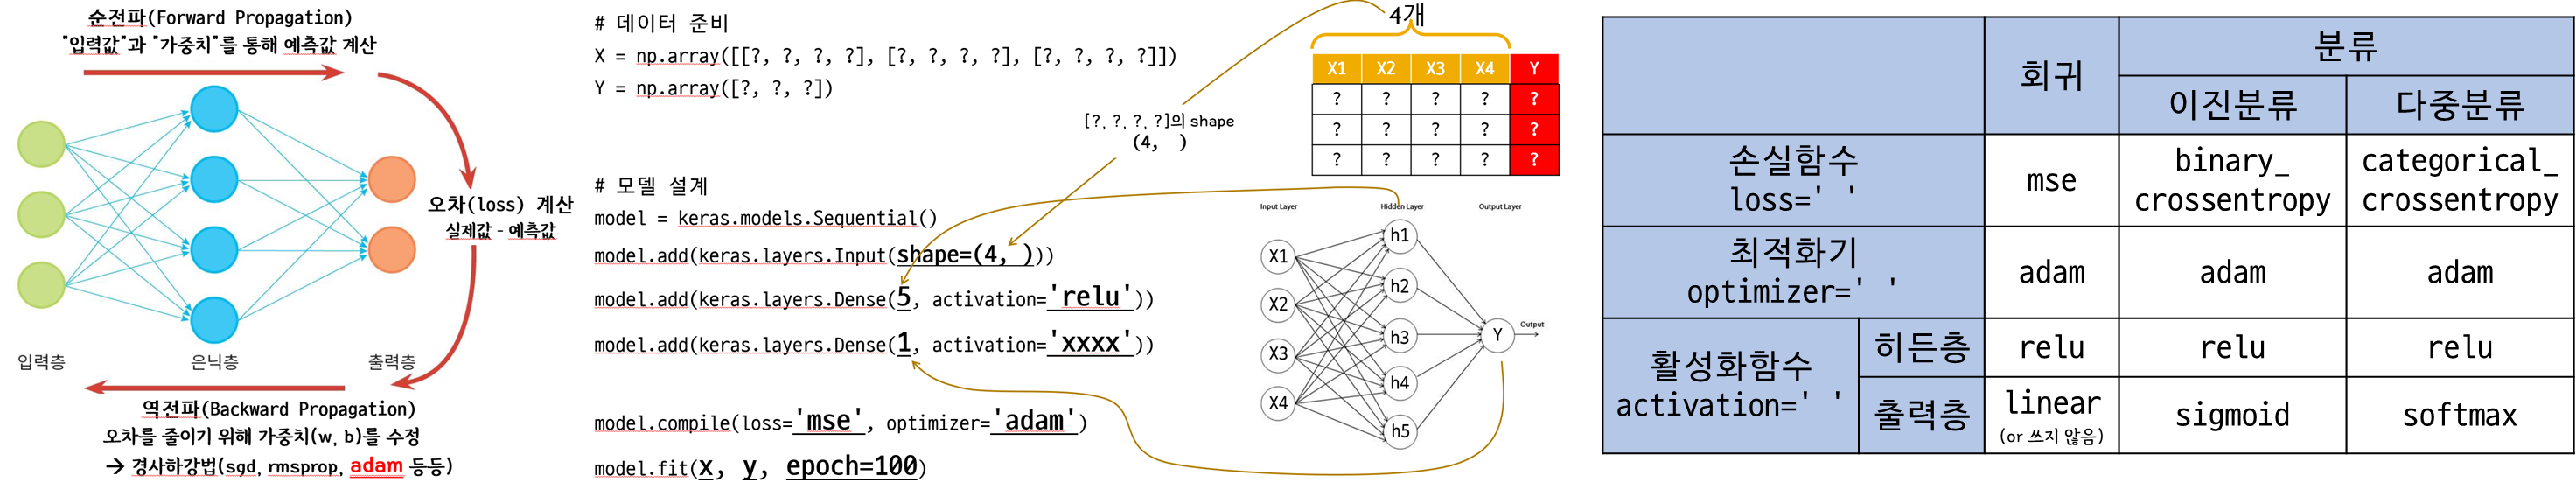

### 1학기 다중 분류 예시
- 손글씨 숫자 이미지를 0, 1, 2, 3, 4, 5, 6, 7, 8, 9로 분류하는 문제는 다중분류에 해당

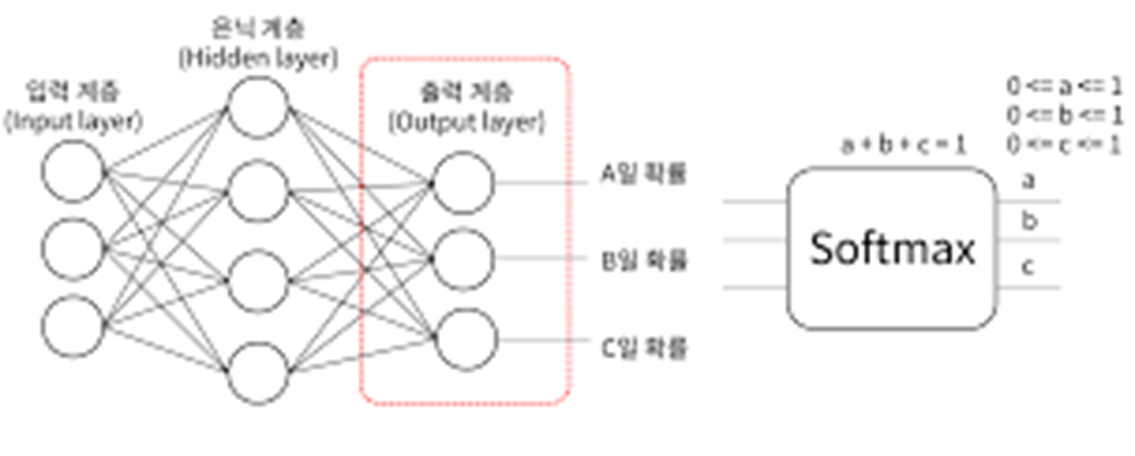

In [ ]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split


# 1. 데이터를 준비한다.
iris = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/iris.csv")
iris

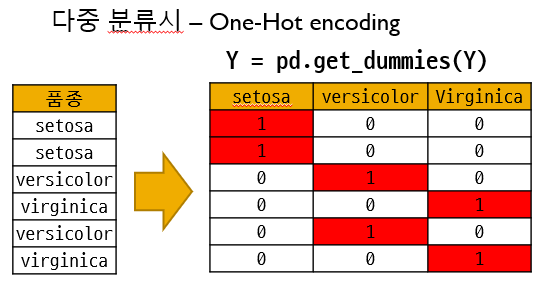

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split


# 1. 데이터를 준비한다.
iris = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/iris.csv")

# 1-1. 독립변수와 종속변수로 분리
X = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
Y = iris['품종']

# 1-2. 종속변수에 대해 one-hot 인코딩(다중 분류) #################################################################
Y = pd.get_dummies(Y)

# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(4, )))
model.add(keras.layers.Dense(16, activation='???'))
model.add(keras.layers.Dense(12, activation='???'))
model.add(keras.layers.Dense(8, activation='???'))
model.add(keras.layers.Dense(3, activation='????'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='?????', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(X, Y, epochs=200)

### 흑백 이미지(Gray Scale)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image = np.array([[0,    50, 100, 200,  55],
                  [255, 200, 110,  50,   0],
                  [0,    50, 120, 200,  55],
                  [255, 200, 130,  50,   0],
                  [0,    50, 140, 200,  55]])

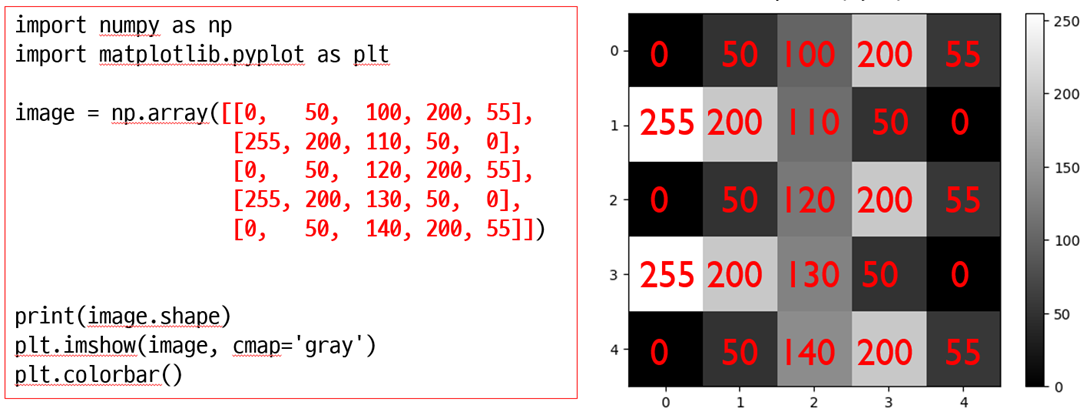

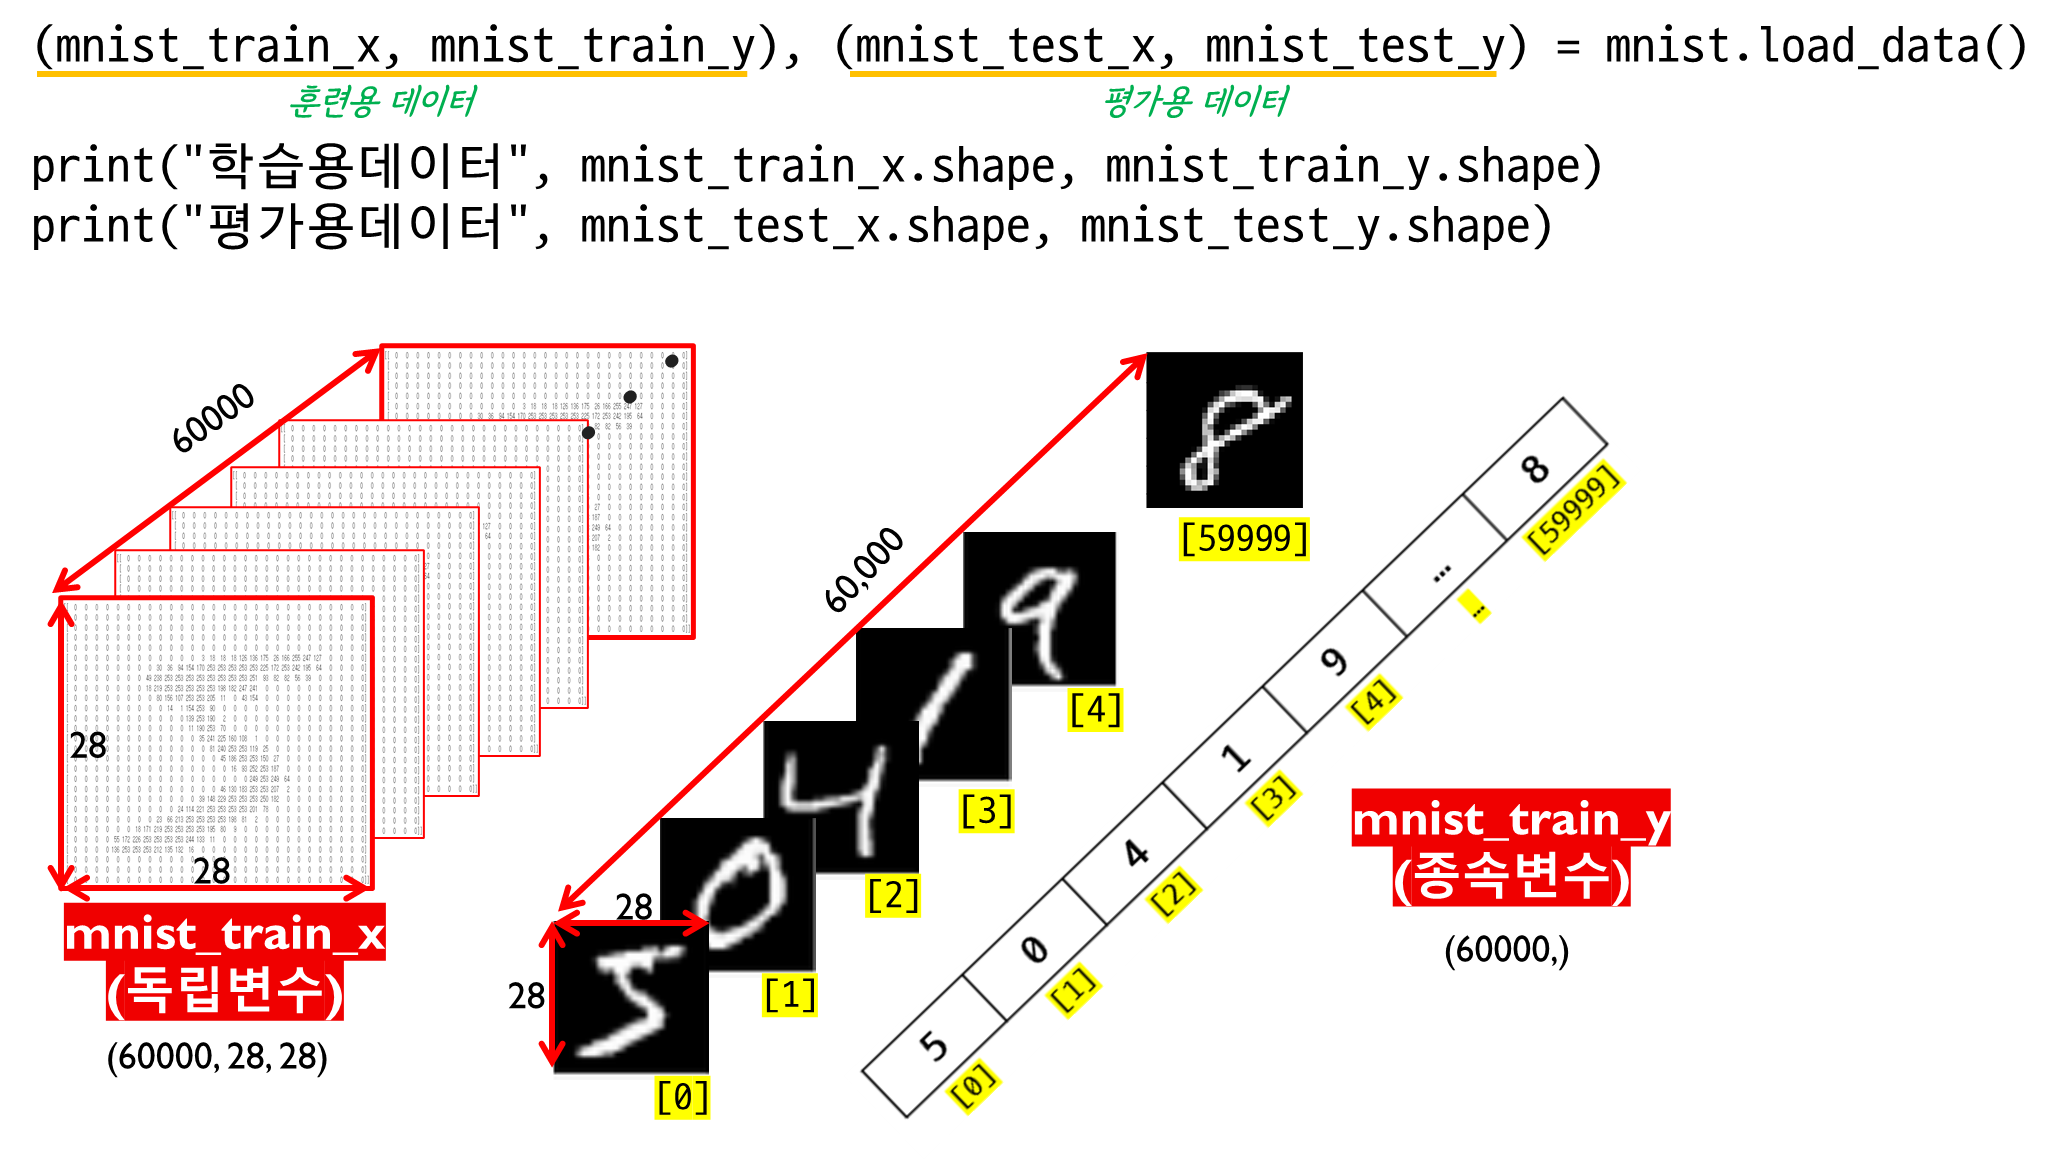

### Mnist 이미지 데이터 셋(3차원)을 2차원의 표로 만들어 보기

> **(60000, 28, 28) --> (60000, ???)**
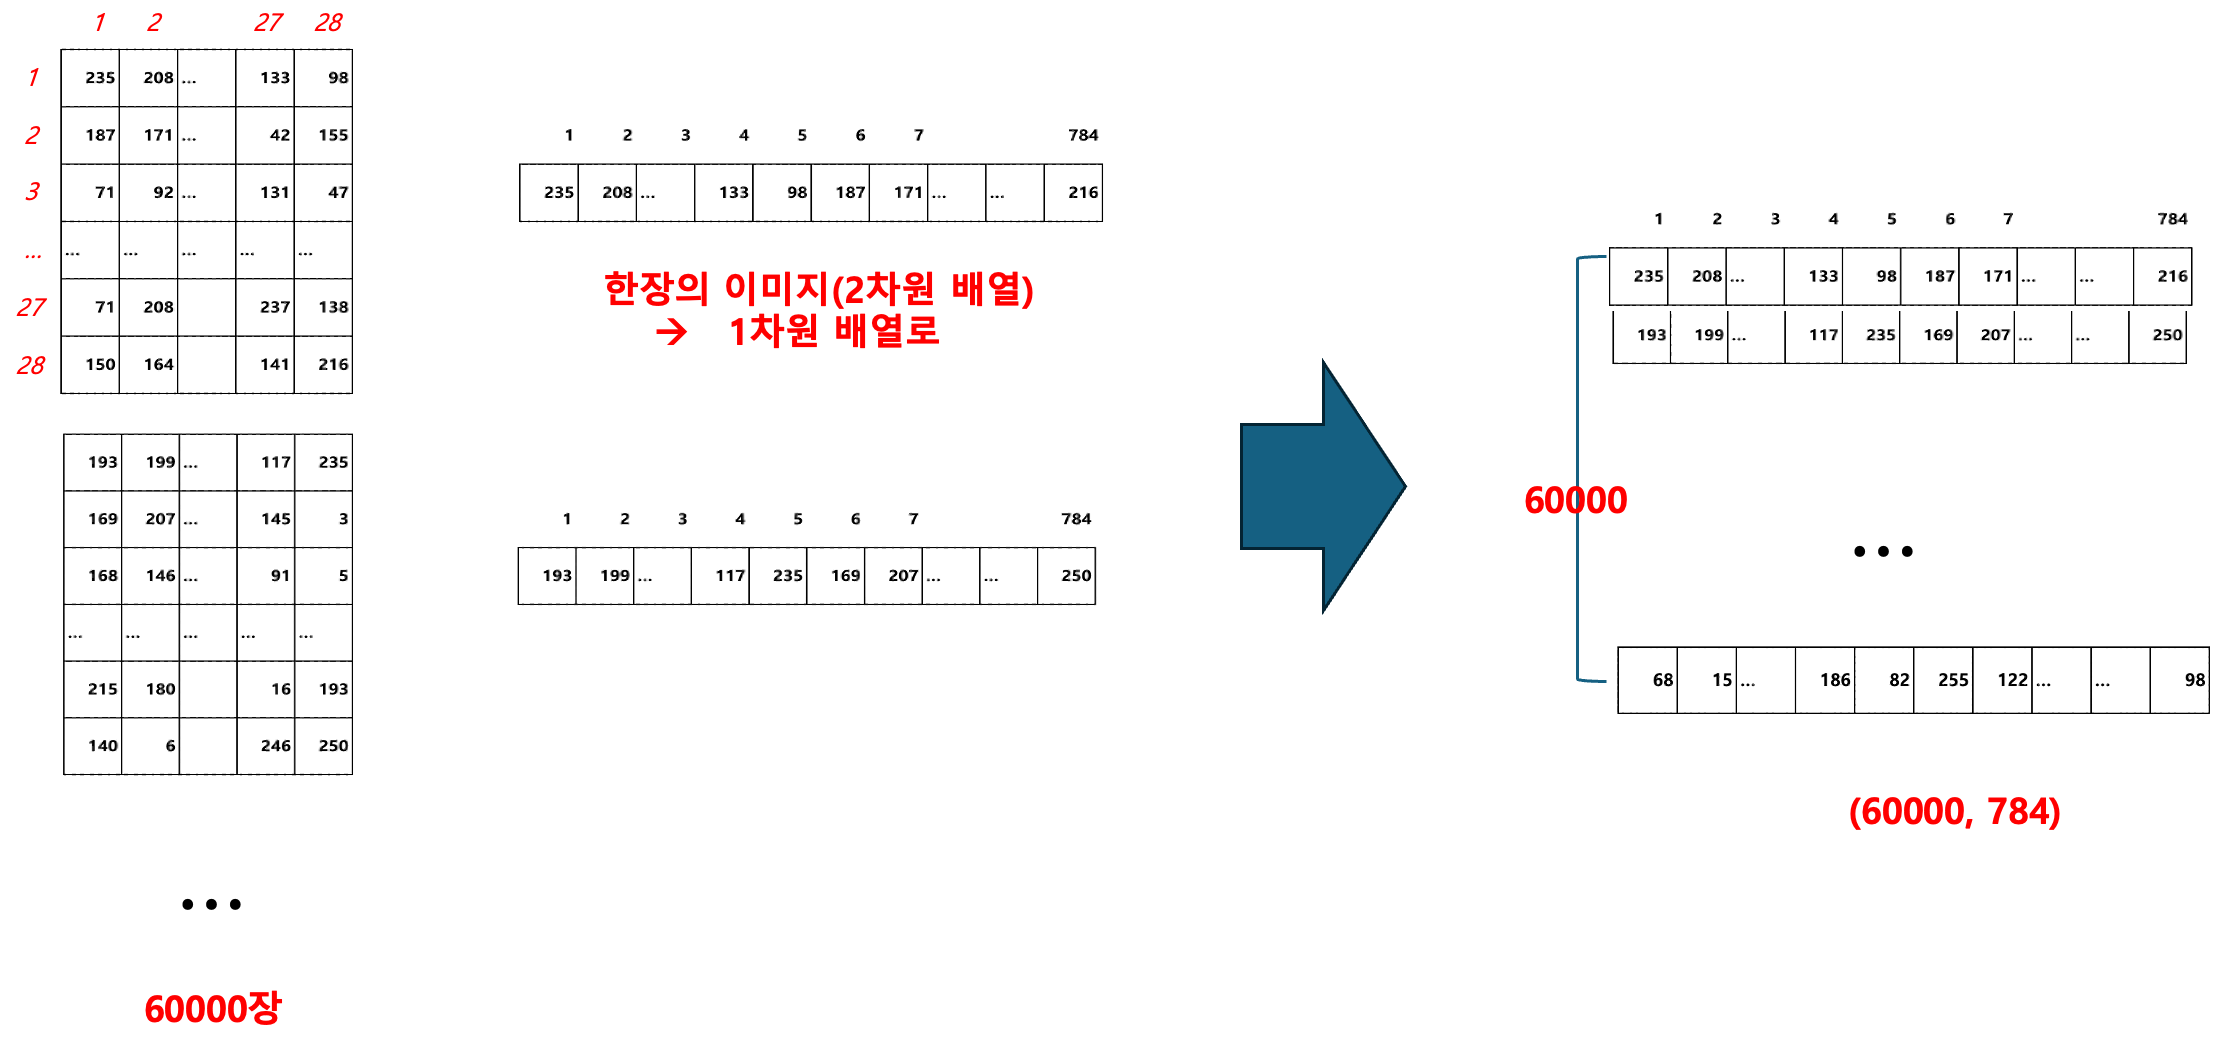
> numpy에서 이 기능을 가진 함수는?

### mnist 단층 레이어(Single-Layer)로 이미지 분류 모델 개발

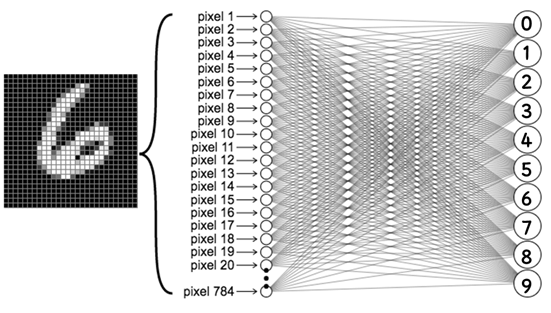

### 데이터 전처리

In [ ]:
# 0. 필요한 모듈 불러오기
import keras
import numpy as np
import pandas as pd

# 1. 데이터 준비하기
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
print(train_x.shape, train_y.shape)

In [ ]:
# 1.1 데이터 전처리
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

sample, row, col = train_x.shape  # (60000, 28, 28)

train_x = np.reshape(train_x, (sample, row*col))      # (60000, 28, 28) --> (60000, 784) 로 변환
#train_y = pd.get_dummies(train_y)                    # pandas를 사용할 때, one-hot 인코딩
train_y = keras.utils.to_categorical(train_y)         # one-hot 인코딩

print(train_x.shape)
print(train_y.shape)

(60000, 784)
(60000, 10)


In [ ]:
# 데이터 불균형 확인
unique, counts = np.unique(train_y, return_counts = True)
uniq_cnt_dict = dict(zip(unique, counts))
uniq_cnt_dict

### 단층 퍼셉트론 모델로 만들어 보기

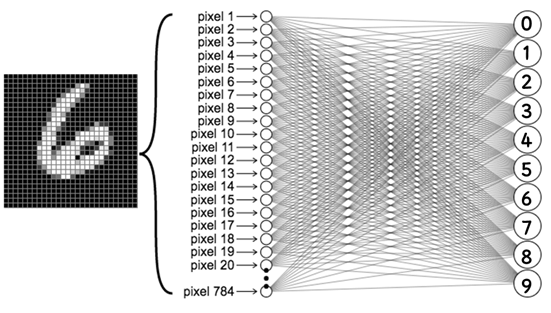

In [ ]:
# 0. 필요한 모듈 불러오기
import keras
import numpy as np

# 1. 데이터 준비하기
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

sample, row, col = train_x.shape  # (60000, 28, 28)
train_x = np.reshape(train_x, (sample, row*col))      # (60000, 28, 28) --> (60000, 784) 로 변환
train_y = keras.utils.to_categorical(train_y)         # one-hot 인코딩

# 2. 모델 설계
model = keras.Sequential()
model.add(keras.layers.Input(shape=(???,)))
model.add(keras.layers.Dense(??, activation='???'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='???', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(train_x, train_y, epochs=10)

### 정규화 (피쳐 스케일링)

- 표준화와 정규화는 데이터의 척도(scale)를 변환하는 기법
- 다양한 측정 단위의 데이터를 동일한 기준으로 비교하거나 분석하기 위해 사용
- 종류 :
> **Min-Max 정규화 (Min-Max Normalization)**,  
> **Z-점수 정규화 (Z-score Normalization or Standardization)**,   
Max-Abs 정규화 (Max-Abs Normalization)   
...

- MinMax 정규화 vs Z-점수 정규화의 선택
> - 두 방법 모두 데이터의 스케일을 조정하여 학습 과정을 안정시키고, 모델의 성능을 향상
> - MinMax정규화는 데이터가 특정 범위 내에 있어야 하는 경우, 또는 특성이 서로 다른 스케일을 가지는 경우에 유용
예를 들어, 이미지 데이터에서 픽셀 값은 일반적으로 [0, 255] 범위를 가지므로, [0, 1] 범위로 정규화하면 신경망 학습이 더 효과적
> - Z-점수 정규화(표준화)는 데이터가 정규 분포를 따르도록 변환해야 하는 경우나, 이상치가 많은 경우에 유용
예를 들어 선형 회귀, 로지스틱 회귀, SVM과 같은 모델에서 특히 효과적

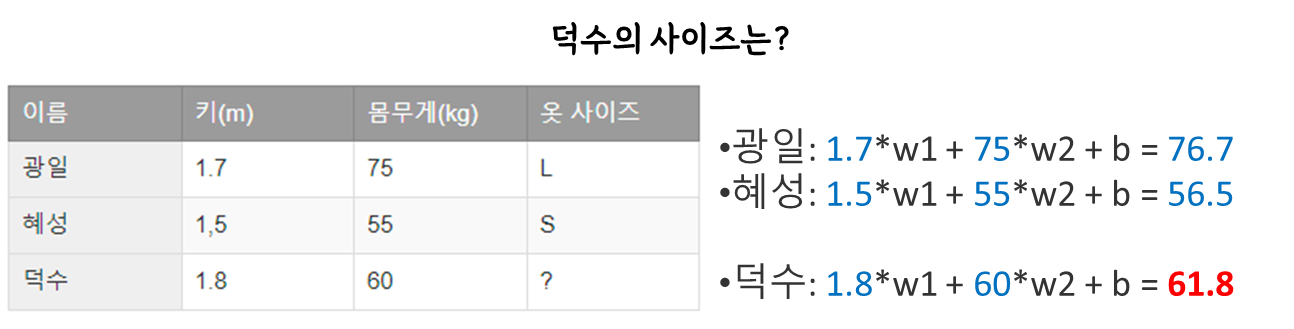

#### Min-Max Scaling 정규화
- 데이터의 최소값과 최대값을 사용하여 데이터의 값을 특정 범위(일반적으로 [0, 1])로 변환하는 기법

- 방법($\mu$는 평균,  $\sigma$는 표준편차)
#####$$X_{\text{new}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

- 장점: 값의 스케일을 통일해주어 모델 학습 시 특정 특징이 과도하게 영향을 미치는 것을 방지
- 단점: 이상치(outlier)에 민감
- 적용사례 : 이미지 처리, 신경망과 --> 범위가 중요한 경우

#### Z-Score 정규화(=표준화Standardization, 정규화라고 하기보다 표준화라고 부름)
- 데이터의 평균을 0, 표준편차를 1로 변환하여 데이터의 값을 표준 정규 분포로 만드는 기법

- 방법($\mu$는 평균,  $\sigma$는 표준편차)
#####$$Z = \frac{X - \mu}{\sigma}$$

- 장점: 이상치에 상대적으로 덜 민감
- 단점: 데이터가 정규 분포를 따를 때 효과적
- 적용사례 : 선형회귀, 로지스틱회귀 --> 거리가 중요한 경우

### 정규화 후에 모델을 생성해 보기

In [ ]:
# 0. 필요한 모듈 불러오기
import keras
import numpy as np

# 1. 데이터 준비하기
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

sample, row, col = train_x.shape  # (60000, 28, 28)
train_x = np.reshape(train_x, (sample, row*col))      # (60000, 28, 28) --> (60000, 784) 로 변환
# ?????????????????? 정규화 코드를 삽입해 보기

train_y = keras.utils.to_categorical(train_y)      # one-hot 인코딩

# 2. 모델 설계
model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(train_x, train_y, epochs=10)

### 다층 퍼셉트론 모델로(MLP)

In [ ]:
# 0. 필요한 모듈 불러오기
import keras
import numpy as np

# 1. 데이터 준비하기
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

sample, row, col = train_x.shape                      # (60000, 28, 28)
train_x = np.reshape(train_x, (sample, row*col))      # (60000, 28, 28) --> (60000, 784) 로 변환
train_x = train_x / 255

train_y = keras.utils.to_categorical(train_y)         # one-hot 인코딩


# 2. 모델 설계
model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(32, activation='???'))
model.add(keras.layers.Dense(64, activation='???'))
model.add(keras.layers.Dense(32, activation='???'))
model.add(keras.layers.Dense(??, activation='????'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='????????', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(train_x, train_y, epochs=10)

### 정답이 정수일 경우에는 One-Hot인코딩 하지 않아도 된다.

In [ ]:
# 0. 필요한 모듈 불러오기
import keras
import numpy as np

# 1. 데이터 준비하기
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

sample, row, col = train_x.shape  # (60000, 28, 28)
train_x = np.reshape(train_x, (sample, row*col))      # (60000, 28, 28) --> (60000, 784) 로 변환
train_x = train_x / 255

########################################################
#train_y = keras.utils.to_categorical(train_y)      # one-hot 인코딩 하지 않음.
########################################################


# 2. 모델 설계
model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='????????', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(train_x, train_y, epochs=10)

### cifar10 컬로 이미지 분류 모델 만들어 보기

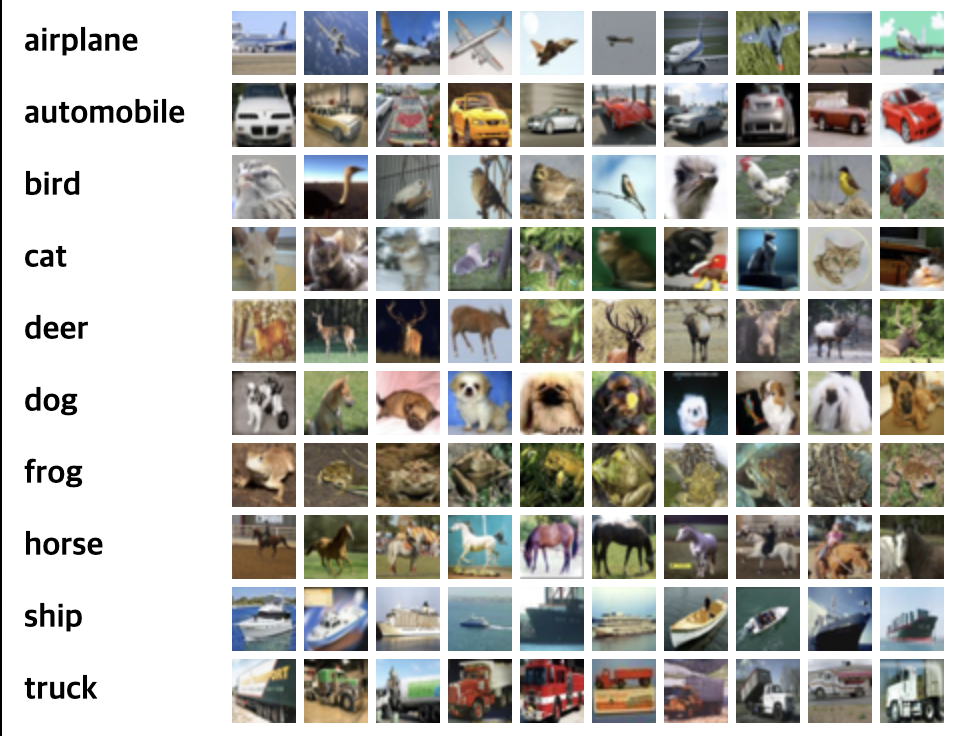

In [ ]:
import keras
import numpy as np

# 1. 데이터 준비하기
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

sample, row, col, ch = train_x.shape                     # (50000, 32, 32, 3)
train_x = np.reshape(train_x, (sample, ??????))          # (50000, 32, 32, 3) --> (50000, ???) 로 변환
train_x = train_x / 255


# 2. 모델 설계
model = keras.Sequential()
model.add(keras.layers.Input(shape=(?????,)))
model.add(keras.layers.Dense(???, activation='relu'))
model.add(keras.layers.Dense(???, activation='relu'))
model.add(keras.layers.Dense(???, activation='relu'))
model.add(keras.layers.Dense(???, activation='???'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(train_x, train_y, epochs=50)